# Introducción

En Los Ángeles, la idea de un café operado por robots es tanto futurista como atractiva. Sin embargo, su éxito a largo plazo depende de cómo se mantenga relevante en un mercado competitivo. Este estudio de mercado examina las condiciones actuales del sector de restaurantes en la ciudad, buscando identificar tendencias, oportunidades y desafíos que podrían afectar el rendimiento del negocio de los robots camareros.

# Descarga preparación de datos

In [103]:
#Importación de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from plotly import graph_objects as go

In [104]:
#Carga de datos
data=pd.read_csv("/datasets/rest_data_us_upd.csv", dtype={'chain': 'category','object_type': 'category'})

In [105]:
#Validación de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   int64   
 1   object_name  9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9648 non-null   category
 4   object_type  9651 non-null   category
 5   number       9651 non-null   int64   
dtypes: category(2), int64(2), object(2)
memory usage: 320.8+ KB


In [106]:
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [107]:
data.duplicated().sum()

0

In [108]:
data["chain"].unique()

['False', 'True', NaN]
Categories (2, object): ['False', 'True']

In [109]:
data= data.dropna(subset=["chain"])

In [110]:
data["object_type"].unique()

['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza']
Categories (6, object): ['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza']

Se modificó tipo de datos, no hay valores duplicados. Se eliminó valores nulos.

In [111]:
data.describe()

,id,number
count,9648.000000,9648.000000
mean,16610.056385,43.703566
std,2786.049701,47.627252
min,11786.000000,1.000000
25%,14197.750000,14.000000
50%,16609.500000,27.000000
75%,19021.250000,46.000000
max,21436.000000,229.000000


La tabla contiene un total de 9648 filas, el promedio de número de asientos es de 43.70.

# Análisis de datos

## Investiga las proporciones de los distintos tipos de establecimientos. 

In [112]:
data_object=data.groupby("object_type")["id"].count().reset_index() #  Agrupando por tipo de establecimiento y calculando cantidad

fig = go.Figure(data=[go.Pie(labels=data_object["object_type"], values=data_object["id"])])
fig.update_layout(title_text='<b>¿Cómo se distribuye los tipos de establecimientos?</b>', title_x=0.5)
fig.show()



El 75.2% de establecimientos son restaurantes, el 11% son Fast Food.

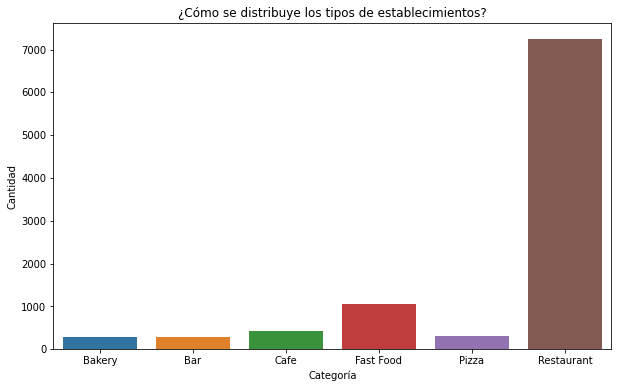

In [113]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='object_type', y='id', data=data_object)

# Configurar título y etiquetas de los ejes
plt.title('¿Cómo se distribuye los tipos de establecimientos?')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

## Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. 

In [114]:
data_cadena=data.groupby("chain")["id"].count().reset_index() # agrupando

In [115]:
# Crear gráfico circular

fig = go.Figure(data=[go.Pie(labels=data_cadena["chain"], values=data_cadena["id"])]) 
fig.update_layout(title_text='<b>¿Qué porcentaje de los establecimientos son parte de una cadena?</b>', title_x=0.5)
fig.show()


El 61.9% de establecimientos no pertenecen a una cadena

## ¿Qué tipo de establecimiento es habitualmente una cadena?

In [116]:
data_= data.groupby(["object_type","chain"])["id"].count().reset_index()
print(data_)


   object_type  chain    id
0       Bakery  False     0
1       Bakery   True   283
2          Bar  False   215
3          Bar   True    77
4         Cafe  False   169
5         Cafe   True   266
6    Fast Food  False   461
7    Fast Food   True   605
8        Pizza  False   166
9        Pizza   True   153
10  Restaurant  False  4961
11  Restaurant   True  2292


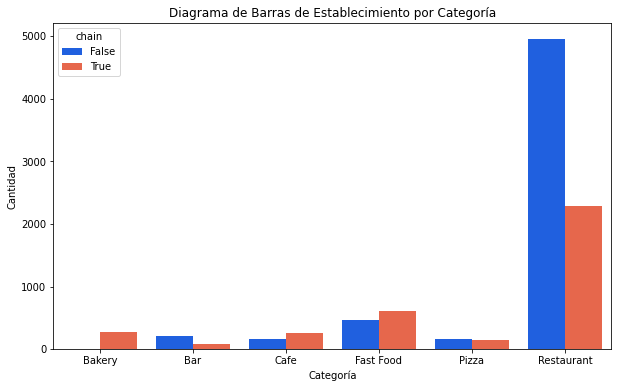

In [117]:
# Definir una paleta de colores más vibrantes
#colores = sns.color_palette("tab12")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='object_type', y='id', data=data_, hue="chain", palette=["#0055FF","#FF5733"])

# Configurar título y etiquetas de los ejes
plt.title('Diagrama de Barras de Establecimiento por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()


El tipo de establecimiento "Bakery","Cafe" y "Fast Food " son usualmente una cadena

## ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

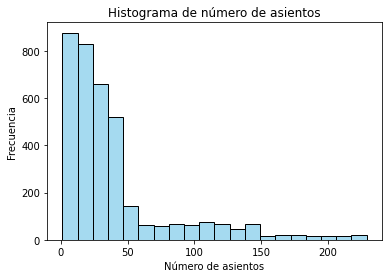

In [118]:
data_cadena_true=data[data["chain"]=="True"] # agrupando
sns.histplot(data_cadena_true["number"], bins=20, color='skyblue', edgecolor='black')
plt.title("Histograma de número de asientos")
plt.xlabel('Número de asientos')
plt.ylabel('Frecuencia')
plt.show()

In [119]:
print(np.percentile(data_cadena_true['number'], [50,90, 95, 99]))


[ 25.   107.   140.   206.25]


Muchos establecimientos con número de asientos menos a 50 por establecimiento.
No más del 90% de establecimientos tiene hasta 107 asientos, y no más del 50% tiene hasta 25 asientos.

## Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos.

In [120]:
data_object = data.groupby("object_type").agg({"id": "count", "number": "sum"}).reset_index() #agrupando por tipo de establecimiento y promediando
data_object["promedio_asientos"]=data_object["number"]/data_object["id"]
print(data_object)

  object_type    id  number  promedio_asientos
0      Bakery   283    6162          21.773852
1         Bar   292   13072          44.767123
2        Cafe   435   10875          25.000000
3   Fast Food  1066   33939          31.837711
4       Pizza   319    9106          28.545455
5  Restaurant  7253  348498          48.048807


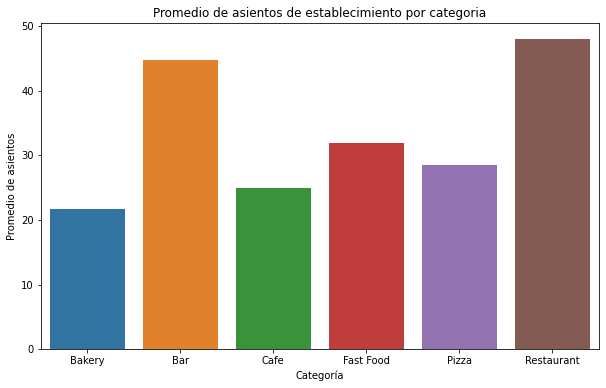

In [121]:
#graficando Promedio de asientos de establecimiento por categoria
plt.figure(figsize=(10, 6))
sns.barplot(x='object_type', y='promedio_asientos', data=data_object)
plt.title('Promedio de asientos de establecimiento por categoria')
plt.xlabel('Categoría')
plt.ylabel('Promedio de asientos')
plt.show()

El tipo de establecimiento "Restaurant" tiene el mayor promedio de asientos por establecimiento y es de 48.048

## Coloca los datos de los nombres de las calles de la columna address en una columna separada.

In [122]:
print(data)

         id          object_name                      address  chain  \
0     11786  HABITAT COFFEE SHOP       3708 N EAGLE ROCK BLVD  False   
1     11787             REILLY'S            100 WORLD WAY 120  False   
2     11788       STREET CHURROS      6801 HOLLYWOOD BLVD 253  False   
3     11789    TRINITI ECHO PARK           1814 W SUNSET BLVD  False   
4     11790               POLLEN           2100 ECHO PARK AVE  False   
...     ...                  ...                          ...    ...   
9646  21432      HALL OF JUSTICE             217 W TEMPLE AVE  False   
9647  21433          FIN-MELROSE             5750 MELROSE AVE  False   
9648  21434          JUICY WINGZ          6741 HOLLYWOOD BLVD   True   
9649  21435      MEDIDATE COFFEE      548 S SPRING ST STE 100  False   
9650  21436         CAFE SPROUTS  1300 S SAN PEDRO ST STE 111   True   

     object_type  number  
0           Cafe      26  
1     Restaurant       9  
2      Fast Food      20  
3     Restaurant      22  


In [131]:
data["calle"] = data["address"].apply(str.strip)
data["calle"] = data["address"].apply(str.upper)
data["calle"]=data["calle"].apply(lambda x: ' '.join(x.split()[1:]))

In [154]:
display(data["calle"].nunique())

3068

In [133]:
data.sample(20)

,id,object_name,address,chain,object_type,number,calle
4960,16746,KELLY'S CAFE,606 S OLIVE ST LL-15,False,Restaurant,24,S OLIVE ST LL-15
6516,18302,CORAL TREE EXPRESS,10250 STA MON BLVD STE FC12,False,Fast Food,48,STA MON BLVD STE FC12
9195,20981,XO BEVERLY,7475 BEVERLY BLVD,False,Restaurant,129,BEVERLY BLVD
1307,13093,BRASIL KISS COFFEE BAR,6350 SANTA MONICA BLVD,True,Cafe,2,SANTA MONICA BLVD
7351,19137,DAVE & BUSTERS,6081 CENTER DR,True,Restaurant,221,CENTER DR
9203,20989,CHICKEN FACTORY RESTAURANT,3844 S FIGUEROA ST,True,Restaurant,18,S FIGUEROA ST
5755,17541,BURGER KING # 10724,1106 N CORNWELL ST,True,Fast Food,103,N CORNWELL ST
5847,17633,MOON JUICE,2839 W SUNSET BLVD,True,Restaurant,17,W SUNSET BLVD
7775,19561,YUCA'S,2056 N HILLHURST AVE,False,Restaurant,25,N HILLHURST AVE
9125,20911,SURF CITY SQUEEZE,3650 W MARTIN LUTHER KING 150,True,Restaurant,14,W MARTIN LUTHER KING 150


In [134]:
data.sort_values(by="calle").reset_index().tail(10)

,index,id,object_name,address,chain,object_type,number,calle
9638,6737,18523,OUMI SUSHI @ SPROUTS,2245 YOSEMITE DR,True,Restaurant,20,YOSEMITE DR
9639,3135,14921,THE PARLOUR ROOM OF HOLLYWOO,6423 YUCCA ST,False,Restaurant,7,YUCCA ST
9640,3468,15254,GOOD GREEK GRILL,6363 YUCCA ST,True,Restaurant,40,YUCCA ST
9641,7918,19704,BELLA JULIA CAFE AND BAKERY,6363 YUCCA ST,True,Bakery,43,YUCCA ST
9642,3149,14935,THE Z00 GRILL,5333 Z00 DR,False,Restaurant,190,Z00 DR
9643,6200,17986,STARBUCKS,1969 ZONAL AVE,True,Cafe,9,ZONAL AVE
9644,1553,13339,PANDA EXPRESS,1969 ZONAL AVE,True,Fast Food,69,ZONAL AVE
9645,1554,13340,ART COFFEE SHOP,1917 ZONAL AVE,False,Cafe,26,ZONAL AVE
9646,1566,13352,PLAZA MARKET PLACE,1969 ZONAL AVE,False,Restaurant,149,ZONAL AVE
9647,3161,14947,LA ZOO,5333 ZOO DR,False,Restaurant,10,ZOO DR


In [136]:
data["calle"] = data["calle"].apply(str.strip)
data["calle"] = data["calle"].apply(lambda x: x.replace(" ", "_"))
data["calle"] = data["calle"].apply(lambda x: x.replace("__", "_"))
sorted_unique_calle = data["calle"].unique()
sorted_unique_calle.sort()


In [139]:
display(sorted_unique_calle)

array(['1/2_3RD_ST', '1/2_7TH_ST', '1/2_BEVERLY_BLVD', ..., 'Z00_DR',
       'ZONAL_AVE', 'ZOO_DR'], dtype=object)

In [146]:
names_fakes =['E_CESAR_CHAVEZ','E_CESAR_E._CHAVEZ']
name_correct = 'E_CESAR_CHAVEZ'

In [147]:
data["calle"] = data["calle"].replace(names_fakes, name_correct)

In [148]:
names_fakes = ['JAMES_M._WOOD','JAMES_M_WOOD','JAMES_WOOD']
name_correct = 'JAMES_M_WOOD'
data["calle"] = data["calle"].replace(names_fakes, name_correct)

In [149]:
names_fakes = ['MILLENIUM','MILLENNIUM']
name_correct = 'MILLENIUM'
data["calle"] = data["calle"].replace(names_fakes, name_correct)

In [150]:
names_fakes = ['Z00_DR']
name_correct = 'ZOO_DR'
data["calle"] = data["calle"].replace(names_fakes, name_correct)

Es importante realizar un correcto registro de la información, se podrìa utilizar listas definidas con los nombres de las calles como lista de validación y mantener un formato para facilitar el análisis de datos.

## Traza un gráfico de las diez mejores calles por número de establecimientos.

In [155]:
data1=data.groupby(by="calle")["id"].count().reset_index() # agrupando por calle y calculando cantidad de establecimientos
data1.columns=["calle","n_establecimientos"] # renombrando columnas
data1= data1.sort_values(by="n_establecimientos",ascending=False).reset_index() # ordenando tabla
data_10 = data1.loc[0:9,:] # extrayendo 10 mejores
data_establecimientos=data_10["calle"]
print(data_establecimientos)

0        W_SUNSET_BLVD
1          W_PICO_BLVD
2       HOLLYWOOD_BLVD
3        WILSHIRE_BLVD
4        S_VERMONT_AVE
5    SANTA_MONICA_BLVD
6             W_3RD_ST
7         BEVERLY_BLVD
8        S_FIGUEROA_ST
9        S_WESTERN_AVE
Name: calle, dtype: object


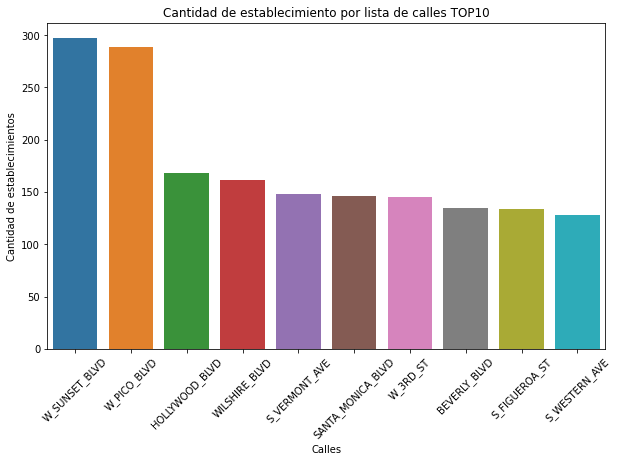

In [156]:
plt.figure(figsize=(10, 6))
sns.barplot(x='calle', y='n_establecimientos', data=data_10)
plt.title('Cantidad de establecimiento por lista de calles TOP10')
plt.xlabel('Calles')
plt.ylabel('Cantidad de establecimientos')
plt.xticks(rotation=45)
plt.show()

La calle con mayor número de establecimientos es W_SUNSET_BLVD.

## Encuentra el número de calles que solo tienen un restaurante.

In [157]:
calles_1_restaurante=data1[data1["n_establecimientos"]==1]
calles_1_restaurante["calle"].nunique()

2438

Existen 2438 calles con solo 1 restaurante.

## Para las calles con muchos establecimientos, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?

In [158]:
data_filtrado = data[data["calle"].isin(data_establecimientos)].reset_index()

display(data_filtrado)

,index,id,object_name,address,chain,object_type,number,calle
0,3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W_SUNSET_BLVD
1,10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,W_SUNSET_BLVD
2,16,11802,HMS BOUNTY,3357 WILSHIRE BLVD,False,Restaurant,147,WILSHIRE_BLVD
3,22,11808,CAMY'S GRILL,3339 WILSHIRE BLVD,False,Restaurant,39,WILSHIRE_BLVD
4,28,11814,BEVERLY FALAFEL,8508 W 3RD ST,False,Restaurant,31,W_3RD_ST
...,...,...,...,...,...,...,...,...
1746,9619,21405,HOUSE OF CURRY,1888 S WESTERN AVE,False,Restaurant,21,S_WESTERN_AVE
1747,9625,21411,EAT THIS CAFE,6545 SANTA MONICA BLVD,False,Restaurant,41,SANTA_MONICA_BLVD
1748,9628,21414,KIFF KAFE,12217 W PICO BLVD,False,Restaurant,29,W_PICO_BLVD
1749,9639,21425,MCDONALD'S,1800 S WESTERN AVE,True,Fast Food,135,S_WESTERN_AVE


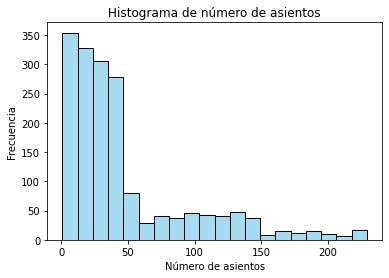

In [159]:
sns.histplot(data_filtrado["number"], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de número de asientos')
plt.xlabel('Número de asientos')
plt.ylabel('Frecuencia')
plt.show()

In [160]:
print(np.percentile(data_filtrado['number'], [50,90, 95, 99]))

[ 31.  124.  147.5 214.5]


El 50% de los restaurantes tienen de 1 a 31 asientos, no más de 10% tienen más de 124 asientos.

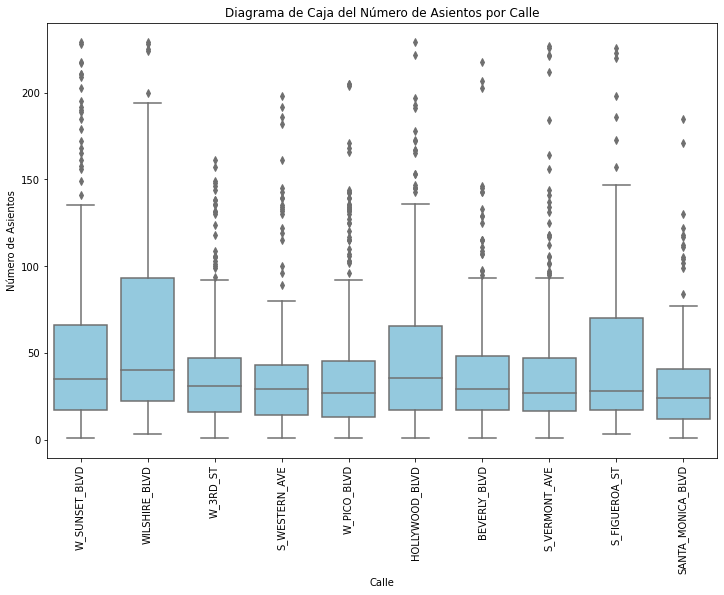

In [161]:
# Crear el diagrama de caja
plt.figure(figsize=(12, 8))
sns.boxplot(x='calle', y='number', data=data_filtrado, color='skyblue')

# Configurar título y etiquetas de los ejes
plt.title('Diagrama de Caja del Número de Asientos por Calle')
plt.xlabel('Calle')
plt.ylabel('Número de Asientos')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

La tendencia en cada calle y establecimiento es que cuenten en promedio con menos de 50 asientos.

## Conclusiones

La presencia de un alto número de establecimientos de comida y la tendencia creciente de la industria de servicios de alimentación sugieren una demanda continua de soluciones innovadoras como los robots meseros.
La prevalencia de cadenas y la identificación de que ciertos tipos de establecimientos suelen ser parte de una cadena sugieren una propensión hacia la adopción de tecnologías avanzadas, como la automatización, en la industria de servicios de alimentación.
En resumen, la implementación de robots meseros presenta oportunidades significativas para mejorar la eficiencia operativa y la experiencia del cliente en el negocio de restaurantes. Sin embargo, también plantea desafíos relacionados con costos, integración, aceptación del cliente y competencia. Para tener éxito en este entorno dinámico, es importante realizar una planificación cuidadosa, evaluación de riesgos y un enfoque centrado en el cliente.

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Te quiero felicitar Lucia porque todo el trabajo ha estado excelente, has hecho todos los cálculos de la forma que debían hacerse y has implementado gráficos ilustrativos que permitían mostrar dicha información de una forma sencilla de comprender. Esto para los clientes es sumamente importante.  A la vez agradecerte por tu compromiso durante todo el proceso con tus conclusiones, se nota tu gran capacidad de comprensión sobre lo trabajado. muy bien hecho! 

# Presentación

Presentation: https://docs.google.com/presentation/d/1CDPA6Yh322zlTnyunZtUxw5RJxZ3Cp9xQcgM0Rsp6iI/edit#slide=id.p

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 2)</b> <a class="tocSkip"></a>

Ahora si puedo acceder, gracias! En general la presentación es correcta y te felicito, esta presentación en conjunto con el trabajo merecen seguir adelante! Felicitaciones!
